In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

## ANN

In [2]:
# 1. Load and preprocess MNSIT dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalise pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten 28x28 images into vectors of 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train.shape


(60000,)

In [3]:
# 2. Define MLP Model
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

2025-11-14 09:33:25.597698: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-14 09:33:25.597865: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-14 09:33:25.597877: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-14 09:33:25.598076: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-14 09:33:25.598095: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 3. Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# 4. Train the Model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/10


2025-11-14 09:33:26.502637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8807 - loss: 0.4171 - val_accuracy: 0.9013 - val_loss: 0.3461
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8796 - loss: 0.4759 - val_accuracy: 0.8522 - val_loss: 0.7445
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8431 - loss: 0.9861 - val_accuracy: 0.8394 - val_loss: 1.4466
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8266 - loss: 1.6774 - val_accuracy: 0.8554 - val_loss: 1.7526
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8187 - loss: 2.5117 - val_accuracy: 0.7993 - val_loss: 2.6873
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8149 - loss: 3.4927 - val_accuracy: 0.8545 - val_loss: 2.7161
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8125 - loss: 4.4184 - val_accuracy: 0.8084 - val_loss: 5.3766
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8163 - loss: 5.2230 - val_accurac

In [6]:
# 5. Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'\nTest accuracy: {test_acc:.4f}')
print(f'Test loss: {test_loss:.4f}')


Test accuracy: 0.8349
Test loss: 5.8399


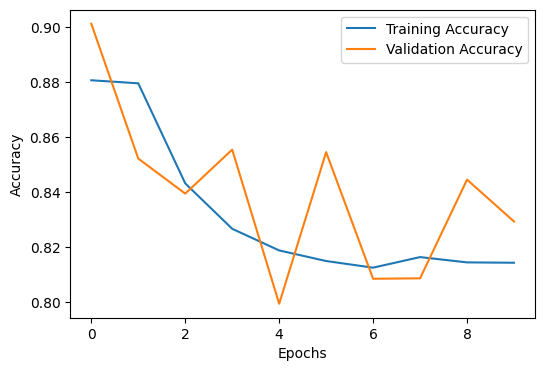

In [7]:
# 6. Plot accuracy curves

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

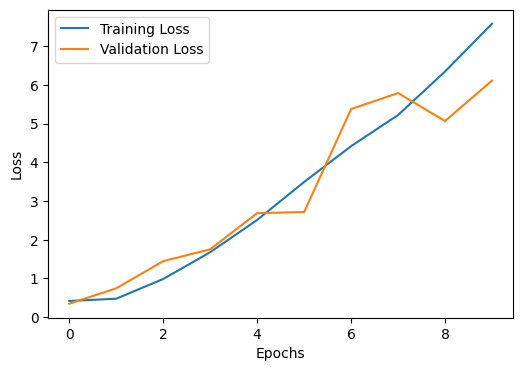

In [8]:
# 7. Plot loss curves
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


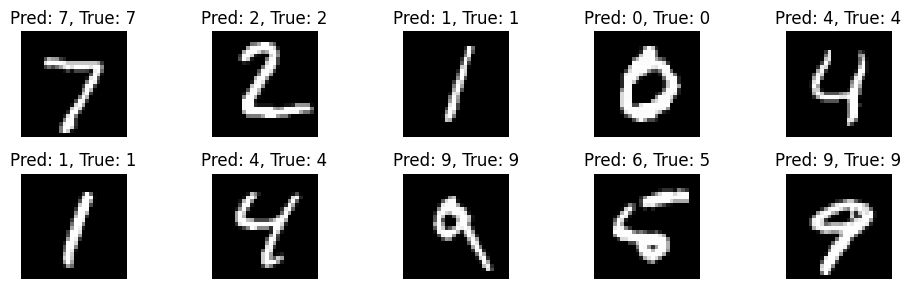

In [9]:
# 8. Make Predictions and display some results
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

# Show first 10 test images. predicted labels, and true labels
plt.figure(figsize=(10, 3))
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title(f'Pred: {pred_labels[i]}, True: {y_test[i]}')
  plt.axis('off')
plt.tight_layout()
plt.show()